## Install Data

In [ ]:
# pip install kagglehub

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("aryan208/financial-transactions-dataset-for-fraud-detection")

# print("Path to dataset files:", path)

In [ ]:
# from google.colab import files

# # Upload kaggle.json
# files.upload()


In [ ]:
import os
import zipfile

# Create the .kaggle directory and move the json file
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle

# Download and unzip the dataset
!kaggle datasets download -d aryan208/financial-transactions-dataset-for-fraud-detection
!unzip -q financial-transactions-dataset-for-fraud-detection.zip -d data


Dataset URL: https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection
License(s): CC0-1.0


## Load Data

Note Loading and further processing may take time as data size

In [1]:
import pandas as pd
data = pd.read_csv("financial_fraud_detection_dataset.csv")

## Explore Data

In [2]:
data.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [ ]:
len(data.columns)

18

Select main features to be used for fraud detection , igroning ids (at least for now ),timestamp ,fraud_type (to focus on is fraud or not in target)

In [16]:
X = data[['amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash']].copy()
y= data[['is_fraud']]#'fraud_type'

In [4]:
len(X)

5000000

In [5]:
X.notnull().sum()

amount                         5000000
transaction_type               5000000
merchant_category              5000000
location                       5000000
device_used                    5000000
time_since_last_transaction    4103487
spending_deviation_score       5000000
velocity_score                 5000000
geo_anomaly_score              5000000
payment_channel                5000000
ip_address                     5000000
device_hash                    5000000
dtype: int64

Non nulls ,except in time_since_last_transaction , for this it may be as first transaction ,so we can replace by -1

In [17]:
X.loc[:, 'time_since_last_transaction'] = X['time_since_last_transaction'].fillna(-1) #no last history


In [18]:
X.notnull().sum()

amount                         5000000
transaction_type               5000000
merchant_category              5000000
location                       5000000
device_used                    5000000
time_since_last_transaction    5000000
spending_deviation_score       5000000
velocity_score                 5000000
geo_anomaly_score              5000000
payment_channel                5000000
ip_address                     5000000
device_hash                    5000000
dtype: int64

In [ ]:
X.describe()

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,1.072917e+00,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,3.240098e+03,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-8.777814e+03,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-1.920275e+03,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,-1.000000e+00,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,1.923796e+03,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,8.757758e+03,5.020000e+00,2.000000e+01,1.000000e+00


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 12 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   amount                       float64
 1   transaction_type             object 
 2   merchant_category            object 
 3   location                     object 
 4   device_used                  object 
 5   time_since_last_transaction  float64
 6   spending_deviation_score     float64
 7   velocity_score               int64  
 8   geo_anomaly_score            float64
 9   payment_channel              object 
 10  ip_address                   object 
 11  device_hash                  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 457.8+ MB


In [ ]:
y.value_counts()

,count
is_fraud,
False,4820447
True,179553


**So data is imbalanced so need some consideration in analysis and using model**

## Preprocess Data

- Encode categorical colmuns to be used in gaussian naive bayes
- Note Encoding here is suitable for this offline training only (can not be saved for later loading)

In [20]:
## Encode
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['transaction_type', 'merchant_category', 'location',
       'device_used', 'payment_channel', 'ip_address', 'device_hash']
le = LabelEncoder()


for col in categorical_cols:
    X[col] = le.fit_transform(X[col])



In [21]:
X.head(5)

,amount,transaction_type,merchant_category,location,device_used,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,343.78,3,7,6,1,-1.0,-0.21,3,0.22,2,684409,3212380
1,419.65,3,2,7,0,-1.0,-0.14,7,0.96,0,1616508,691787
2,2773.86,0,3,2,2,-1.0,-1.78,20,0.89,2,1893332,1629699
3,1666.22,0,2,5,2,-1.0,-0.60,6,0.37,3,198681,3819233
4,24.43,2,7,7,1,-1.0,0.79,13,0.27,0,220250,2829128


Normalize other numerical features

In [22]:
## Normalize
from sklearn.preprocessing import StandardScaler

# List of numeric columns (example — adjust to your dataset)
numeric_cols = ['amount', 'time_since_last_transaction', 'spending_deviation_score',
                'velocity_score', 'geo_anomaly_score']

# Create a scaler instance
scaler = StandardScaler()

# Fit and transform
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [23]:
X.head(5)

,amount,transaction_type,merchant_category,location,device_used,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,-0.032248,3,7,6,1,-0.00064,-0.209443,-1.300767,-0.970185,2,684409,3212380
1,0.129201,3,2,7,0,-0.00064,-0.139499,-0.607147,1.593607,0,1616508,691787
2,5.138870,0,3,2,2,-0.00064,-1.778177,1.647120,1.351087,2,1893332,1629699
3,2.781854,0,2,5,2,-0.00064,-0.599128,-0.780552,-0.450497,3,198681,3819233
4,-0.711812,2,7,7,1,-0.00064,0.789751,0.433284,-0.796956,0,220250,2829128


In [24]:
y = y.astype(int)

In [25]:
# Combine X and y to work with class-balanced sampling
df_under = pd.concat([X, y], axis=1)

# Separate majority and minority classes
df_majority = df_under[df_under.is_fraud == 0]
df_minority = df_under[df_under.is_fraud == 1]

# Downsample majority class to match minority class size
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# Concatenate downsampled majority and full minority
df_undersampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_undersampled = df_undersampled.sample(frac=1, random_state=42)

# Split features and labels
X_under = df_undersampled.drop("is_fraud", axis=1)
y_under = df_undersampled["is_fraud"]

# Now split into training and test sets (no need to stratify here)
X_train, X_test, y_train, y_test = train_test_split(
    X_under, y_under, test_size=0.2, random_state=42
)


## Hyperparameters selection

As data imbalanced ,we will use gaussian naive bayes , and select hyperparameters by optuna maximizing F Score

In [7]:

import warnings
import numpy as np
warnings.filterwarnings("ignore")


In [26]:
sample_size = 10000
sample_indices = X.sample(n=sample_size, random_state=42).index

X_sample = X.loc[sample_indices]
y_sample = y.loc[sample_indices]
y_sample=np.array(y_sample)

In [ ]:
pip install optuna

In [ ]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Split data
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

def objective(trial):
    # Suggest values for the hyperparameters
    var_smoothing = trial.suggest_float('var_smoothing', 1e-15, 1e-3, log=True) # smoothing to avoid zero probabilities
    prior_a = trial.suggest_float('prior_a', 0.0, .4)
    prior_b = 1 - prior_a  # This ensures that the two priors sum to 1



    # Initialize the model with the hyperparameters
    model_i = GaussianNB(var_smoothing=var_smoothing, priors=[prior_a, prior_b])

    # Fit the model
    model_i.fit(X_train, y_train)

    # Evaluate predictions
    y_pred_i = model_i.predict(y_test)

    # Return F1-score
    return f1_score(y_test, y_pred_i)

# Create and optimize the study
study = optuna.create_study(direction='maximize')  # Maximize the F1-score
study.optimize(objective, n_trials=50)

# Best result
print("Best params:", study.best_params)
print("Best F1-score:", study.best_value)


In [ ]:
print("Best params:", study.best_params)
print("Best F1-score:", study.best_value)

Best params: {'var_smoothing': 8.15674367706995e-15, 'prior_a': 0.3686090108800271}
Best F1-score: 0.07267297162767546


# DownSampling

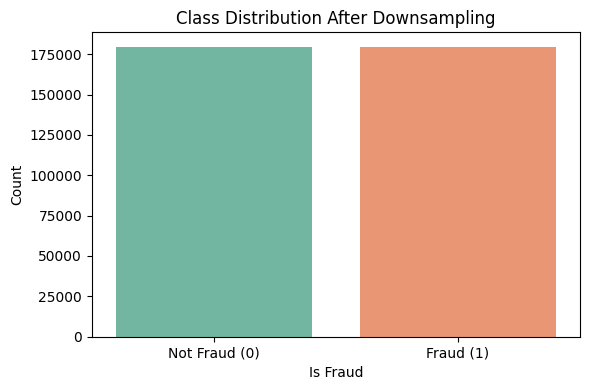

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution after downsampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_under, palette="Set2")
plt.title("Class Distribution After Downsampling")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()


In [ ]:
y_under.value_counts()

,count
is_fraud,
0,179553
1,179553


In [ ]:
var_smoothing = 3.920778958037333e-14
prior_a = 0.35443940696930026
priors = [prior_a, 1 - prior_a]

## Train model

In [ ]:
# model = GaussianNB(var_smoothing=var_smoothing, priors=priors)
model = GaussianNB()


model.fit(X_train, y_train)

GaussianNB()

In [ ]:
model.score(X_test, y_test)

0.4984405892344964

then calcualte f score , accuracy ,plots for data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt




# 2. Predict on test and train sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# 3. Classification reports
print("=== Test Classification Report ===")
print(classification_report(y_test, y_pred_test))

print("=== Train Classification Report ===")
print(classification_report(y_train, y_pred_train))

# 4. Confusion matrices
print("=== Test Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_test))

print("=== Train Confusion Matrix  ===")
print(confusion_matrix(y_train, y_pred_train))


=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.45      0.48     35988
           1       0.50      0.54      0.52     35834

    accuracy                           0.50     71822
   macro avg       0.50      0.50      0.50     71822
weighted avg       0.50      0.50      0.50     71822

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.46      0.48    143565
           1       0.50      0.55      0.52    143719

    accuracy                           0.50    287284
   macro avg       0.50      0.50      0.50    287284
weighted avg       0.50      0.50      0.50    287284

=== Test Confusion Matrix ===
[[16312 19676]
 [16347 19487]]
=== Train Confusion Matrix  ===
[[65890 77675]
 [65349 78370]]


=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.45      0.48     35988
           1       0.50      0.54      0.52     35834

    accuracy                           0.50     71822
   macro avg       0.50      0.50      0.50     71822
weighted avg       0.50      0.50      0.50     71822

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.46      0.48    143565
           1       0.50      0.55      0.52    143719

    accuracy                           0.50    287284
   macro avg       0.50      0.50      0.50    287284
weighted avg       0.50      0.50      0.50    287284



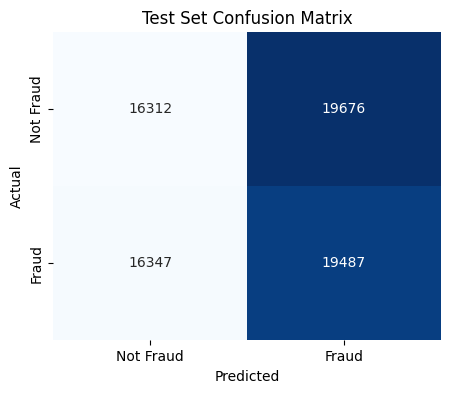

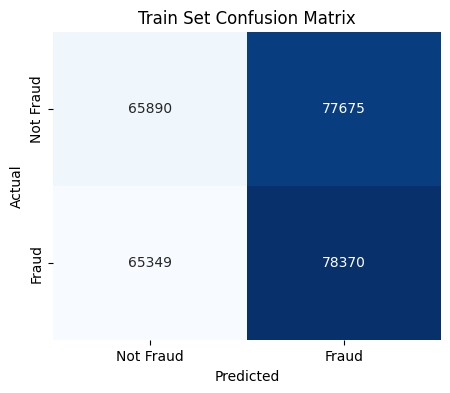

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# 2. Classification reports
print("=== Test Classification Report ===")
print(classification_report(y_test, y_pred_test))

print("=== Train Classification Report ===")
print(classification_report(y_train, y_pred_train))

# 3. Confusion Matrices
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

# 4. Plot function
def plot_confusion(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# 5. Plot them
plot_confusion(cm_test, "Test Set Confusion Matrix")
plot_confusion(cm_train, "Train Set Confusion Matrix")


# Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
X_train_tf = tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.to_numpy(), dtype=tf.float32)

X_test_tf = tf.convert_to_tensor(X_test.to_numpy(), dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.to_numpy(), dtype=tf.float32)

In [ ]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")  # Binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC", "accuracy"])

In [ ]:
history = model.fit(X_train_tf, y_train_tf, epochs=5, batch_size=1024, validation_split=0.2)


Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 71s 13ms/step - AUC: 0.5001 - accuracy: 0.4997 - loss: 30520.6719 - val_AUC: 0.5001 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - AUC: 0.5029 - accuracy: 0.5036 - loss: 37.7687 - val_AUC: 0.5000 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - AUC: 0.5013 - accuracy: 0.5021 - loss: 12.1909 - val_AUC: 0.5000 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - AUC: 0.4998 - accuracy: 0.5011 - loss: 6.4084 - val_AUC: 0.5000 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - AUC: 0.5003 - accuracy: 0.4982 - loss: 4.1576 - val_AUC: 0.5000 - val_accuracy: 0.4998 - val_loss: 0.6931


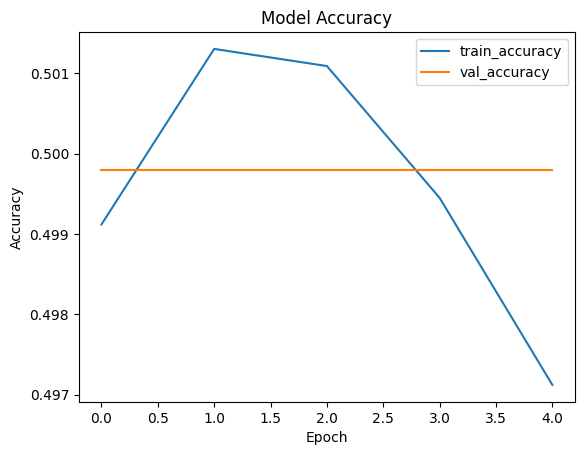

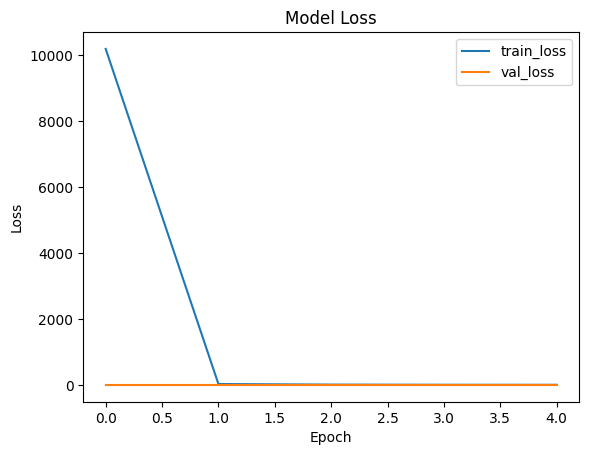

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.4971
Final Validation Accuracy: 0.4998


In [ ]:
test_loss, test_auc, test_accuracy = model.evaluate(X_test_tf, y_test_tf)
print(f"Test Accuracy: {test_accuracy:.4f}")

2245/2245 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.5000 - accuracy: 0.5010 - loss: 0.6931
Test Accuracy: 0.4989
